In [1]:
import numpy as np 
import random
import networkx as nx
import matplotlib.pyplot as plt
import time 

In [2]:


def nNumber(G,r,step):
    n=len(G)
    z=n
    t=0
    M_array=np.zeros(step)
    M={random.randint(0,n-1)}
    D={j for j in range(0,n)}
    R=D-M;u=0
    while u<step:
        i=len(M)     
        k=random.random()
        pi_neg=(n-i)/((n-i)+(i*r))
        pi_pos=(i*r)/((n-i)+(i*r))
        pii=1-(pi_neg+pi_pos)
        if k<(1-pii) and i!=0  :

        
            if k<pi_pos:  ###probabililty for a mutant to reproduce
                ch=random.sample(M,1)
                NE=[n for n in G.neighbors(ch[0])]
                chh=random.sample(NE,1)
                if chh[0]  in R:
                    M.add(chh[0])
                    R.remove(chh[0])
                    t+=1

            else:   ###of course when p <(1-pii) and >pi_pos so this is obvious this is for a mutant to die lonely
                chre=random.sample(R,1)
                NEre=[n for n in G.neighbors(chre[0])]
                chhre=random.sample(NEre,1)
                if chhre[0]  in M:
                    R.add(chhre[0])
                    M.remove(chhre[0])
                    t+=1
        M_array[u]=len(M)/n
        u=u+1
            
    return(t,M_array)

In [3]:
num=100            #number of runs with different initial conditions
step=2000         #number of timesteps used in simulation
size=10            #number of nodes
r=1.8              #fitness
G=nx.random_tree(size,seed=0);

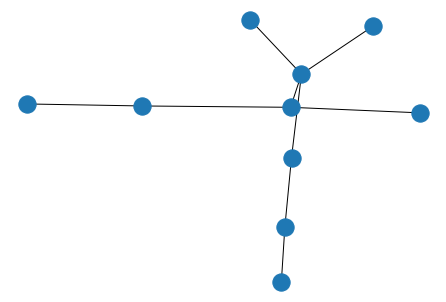

In [4]:
nx.draw(G)

In [5]:
H

matrix([[0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 1., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [6]:
a=np.matrix([[0., 0., 0., 1., 1., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 1., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])     #One leave added to the Matrix

In [7]:
t1=time.time()
num=100            #number of runs with different initial conditions
step=10000         #number of timesteps used in simulation
size=10            #number of nodes
r=2                #fitness
#a=nx.random_tree(size,seed=0);
G=nx.from_numpy_matrix(a)
fix_time=[]
for h in range (num):
    t,s,m=nNumber(G,r,step)
    for ttt in range(len(m)):
        if m[ttt]==m[-1]:
            fix_time.append(ttt)
            break
    np.savetxt('mut_time'+str(h)+'.dat',m)
    
t2=time.time()
print(t2-t1)

7.994620084762573


In [8]:
fix_time

[445,
 217,
 126,
 183,
 385,
 342,
 146,
 123,
 127,
 197,
 332,
 935,
 47,
 228,
 560,
 238,
 5,
 207,
 154,
 635,
 2,
 507,
 74,
 170,
 367,
 187,
 352,
 154,
 171,
 263,
 122,
 251,
 201,
 51,
 56,
 78,
 175,
 272,
 346,
 286,
 206,
 109,
 193,
 281,
 230,
 1,
 38,
 459,
 158,
 469,
 64,
 217,
 5,
 366,
 5,
 269,
 119,
 492,
 68,
 154,
 371,
 146,
 188,
 206,
 179,
 142,
 207,
 1,
 67,
 506,
 127,
 127,
 174,
 90,
 307,
 186,
 208,
 193,
 83,
 260,
 229,
 145,
 0,
 56,
 5,
 189,
 277,
 185,
 310,
 544,
 186,
 278,
 9,
 210,
 149,
 309,
 51,
 199,
 312,
 360]

In [9]:
len(fix_time)

100

In [10]:
np.sum(fix_time)/len(fix_time)

213.91

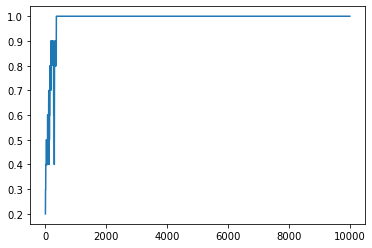

In [11]:
plt.plot(m)

In [12]:
F=[]
for m in range (num):
    F.append(np.loadtxt('mut_time'+str(m)+'.dat'))

In [13]:
M_array=np.zeros(step) #length of sm is number of steps
for m in range (num):
    M_array=M_array+F[m]
M_avg=M_array/num

Text(0, 0.5, 'Mutants')

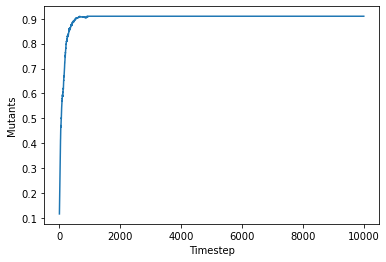

In [14]:
plt.plot(M_avg)
plt.xlabel("Timestep")
plt.ylabel("Mutants")

In [15]:
def fixation_time(A):
    time_list=[]
    for i in range (len(A)):
        if A[i]==A[-1]:
            time_list.append(i)
            break
    return time_list[0]

In [16]:
fixation_time(M_avg)

935

Text(0, 0.5, 'Mutants')

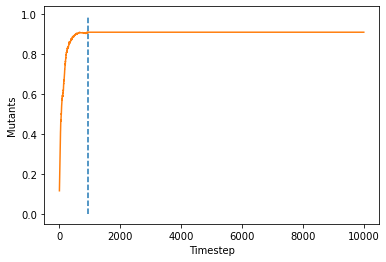

In [17]:
Y=np.arange(0,1,0.01)
X=np.tile(np.array([fixation_time(M_avg)]),(1,len(Y)))[0]
plt.plot(X,Y,'--',markersize=10)

plt.plot(M_avg)
plt.xlabel("Timestep")
plt.ylabel("Mutants")